In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
df.shape

(100, 4)

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt

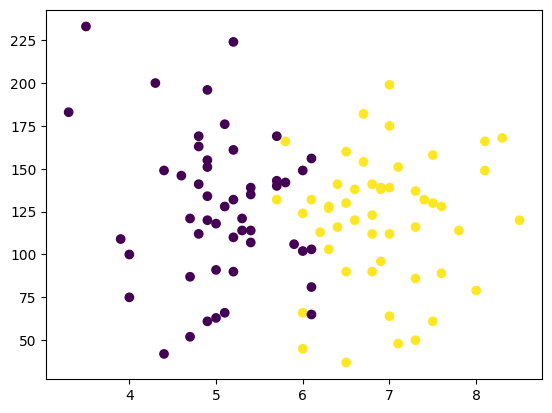

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

(array([ 6., 29., 27., 27., 11.]),
 array([3.3 , 4.34, 5.38, 6.42, 7.46, 8.5 ]),
 <BarContainer object of 5 artists>)

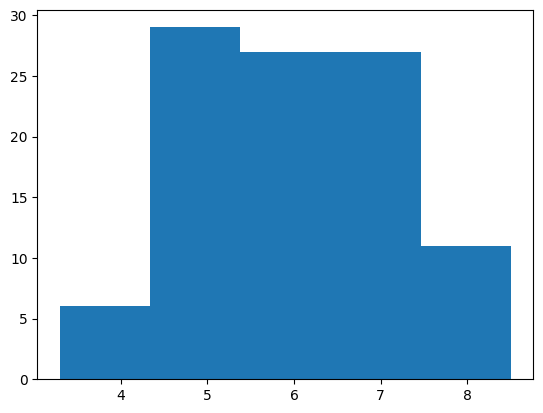

In [ ]:
plt.hist(df['cgpa'],bins=5)

<ipython-input-10-dd1eca269673>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


<Axes: xlabel='cgpa', ylabel='Density'>

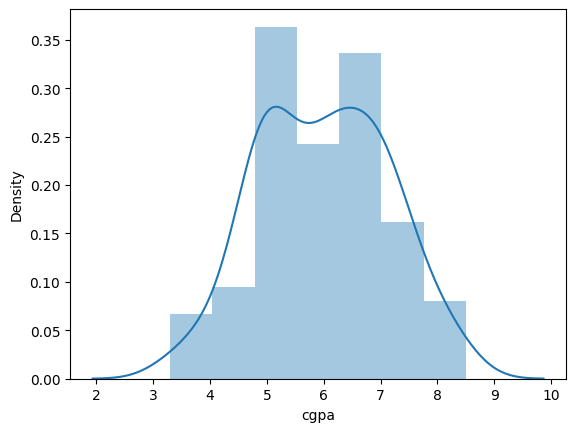

In [ ]:
sns.distplot(df['cgpa'])

In [ ]:
df['iq'].min()

37.0

In [ ]:
df['iq'].max()

233.0

In [ ]:
df['iq'].mean()

123.58

In [ ]:
df['iq'].skew()

0.018095580898964243

<Axes: ylabel='iq'>

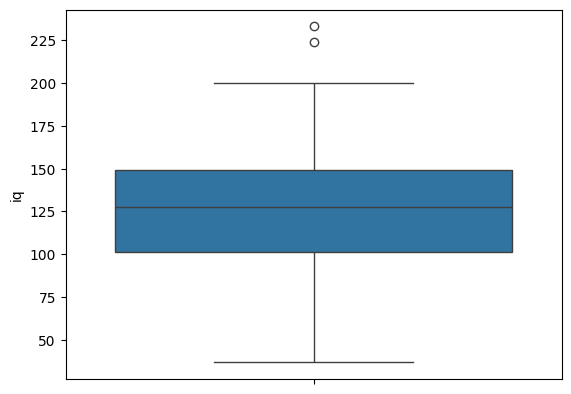

In [ ]:
sns.boxplot(df['iq'])

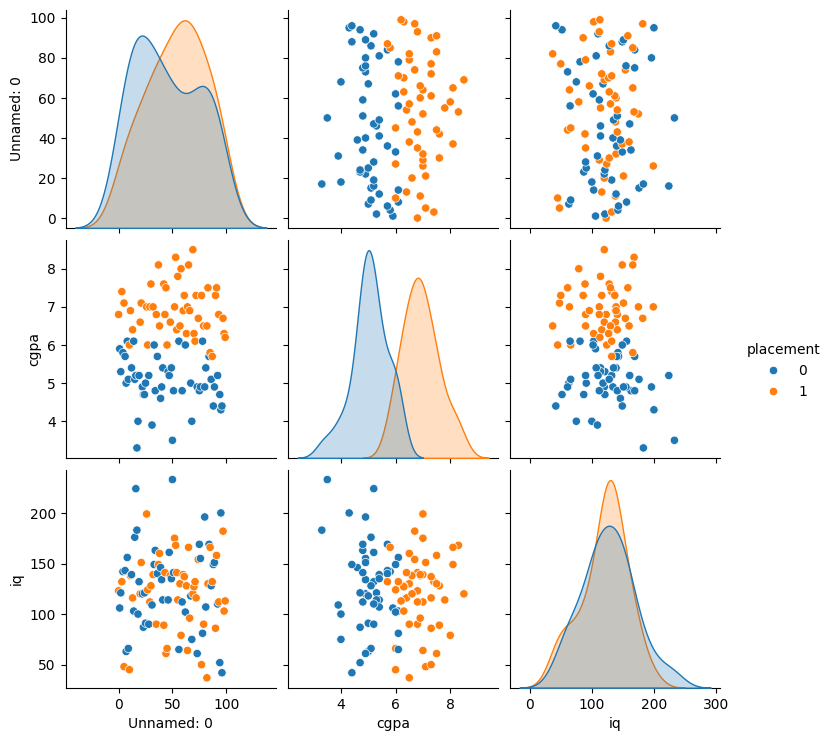

In [ ]:
sns.pairplot(df, hue="placement")

In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
y.shape

(100,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [ ]:
X_train

,cgpa,iq
62,6.0,102.0
38,6.5,160.0
81,5.4,107.0
23,4.7,87.0
91,7.5,158.0
...,...,...
71,6.1,132.0
52,7.0,175.0
39,4.6,146.0
74,6.7,154.0


In [ ]:
y_train

,placement
62,0
38,1
81,0
23,0
91,1
...,...
71,1
52,1
39,0
74,1


In [ ]:
X_test

,cgpa,iq
48,6.6,138.0
29,7.0,112.0
59,4.8,112.0
25,5.0,91.0
0,6.8,123.0
97,6.7,182.0
83,7.5,130.0
99,6.2,113.0
73,4.9,61.0
61,7.3,137.0


In [ ]:
y_test

,placement
48,1
29,1
59,0
25,0
0,1
97,1
83,1
99,1
73,0
61,1


In [ ]:
X_train.shape, X_test.shape

((90, 2), (10, 2))

In [ ]:
y_train.shape, y_test.shape

((90,), (10,))

In [ ]:
mean_cgpa=X_train['cgpa'].mean()

In [ ]:
median_cgpa=X_train['cgpa'].median()

In [ ]:
X_train['cgpa_median']=X_train['cgpa'].fillna(median_cgpa)
X_train['cgpa_mean']=X_train['cgpa'].fillna(mean_cgpa)
X_train.sample(5)

,Unnamed: 0,cgpa,cgpa_median,cgpa_mean
99,99,6.2,6.2,6.2
58,58,8.0,8.0,8.0
52,52,7.0,7.0,7.0
90,90,7.3,7.3,7.3
88,88,4.4,4.4,4.4


In [ ]:
print('Original cgpa variable variance:',X_train['cgpa'].var())
print('cgpa Variance after median imputation:',X_train['cgpa_median'].var())
print('cgpa Variance after mean imputation:',X_train['cgpa_mean'].var())

Original cgpa variable variance: 1.2646204744069913
cgpa Variance after median imputation: 1.2646204744069913
cgpa Variance after mean imputation: 1.2646204744069913


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[ 3.57198606e-02, -5.40886681e-01],
       [ 4.70150598e-01,  8.85807849e-01],
       [-4.85597024e-01, -4.17895773e-01],
       [-1.09380006e+00, -9.09859404e-01],
       [ 1.33901207e+00,  8.36611486e-01],
       [-1.00691391e+00,  9.59602394e-01],
       [ 1.16523978e+00, -1.96512139e-01],
       [ 1.22606008e-01, -1.05744849e+00],
       [-1.00691391e+00,  4.18442400e-01],
       [ 8.17695188e-01, -6.88475770e-01],
       [-8.33141614e-01, -1.50021576e+00],
       [ 2.03410125e+00,  1.08259330e+00],
       [-1.38052434e-01,  4.43040581e-01],
       [-1.00691391e+00,  1.10719148e+00],
       [ 7.30809041e-01,  4.18442400e-01],
       [-6.59369319e-01,  1.97058766e-01],
       [-9.20027762e-01,  2.46255129e-01],
       [-1.09380006e+00, -1.77079576e+00],
       [ 3.57198606e-02, -1.42642122e+00],
       [-2.24938582e-01,  1.10719148e+00],
       [ 1.16523978e+00, -9.34457586e-01],
       [ 1.22606008e-01, -5.16288500e-01],
       [ 3.83264451e-01,  4.18442400e-01],
       [-5.

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[ 0.55703675,  0.34464785],
       [ 0.90458134, -0.29490487],
       [-1.00691391, -0.29490487],
       [-0.83314161, -0.81146668],
       [ 0.73080904, -0.02432487],
       [ 0.64392289,  1.42696784],
       [ 1.33901207,  0.1478624 ],
       [ 0.20949216, -0.27030668],
       [-0.92002776, -1.54941212],
       [ 1.16523978,  0.32004967]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
#model training
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_test

,placement
48,1
29,1
59,0
25,0
0,1
97,1
83,1
99,1
73,0
61,1


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

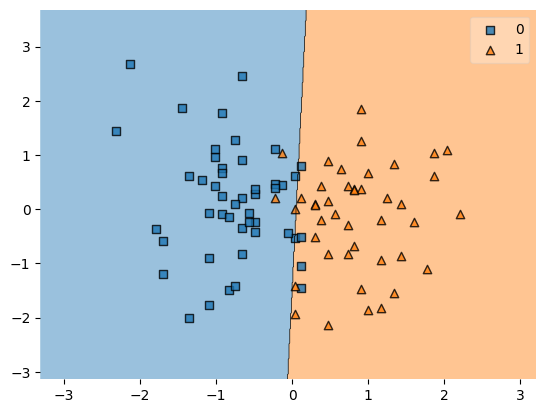

In [ ]:
plot_decision_regions(X_train, y_train.values, clf=clf,)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl' , 'wb'))